<a href="https://colab.research.google.com/github/Be-B/Data-Visualization/blob/main/4%E1%84%8C%E1%85%A1%E1%86%BC_LinearRegression_%E1%84%8C%E1%85%AE%E1%84%90%E1%85%A2%E1%86%A8%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%EC%8B%A4%EC%8A%B5%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석 (1) 주택가격 회귀 분석

In [5]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기
import warnings

warnings.filterwarnings(action='ignore')

### - 머신러닝 패키지 sklearn 설치

In [6]:
# !pip install scikit-learn==1.0.2

## 1) 데이터 수집

In [28]:
import numpy as np
import pandas as pd

# 싸이킷런 설치에 오류가 있어서 별도로 csv를 구해와서 read하였습니다.
# from sklearn.datasets import load_boston
boston =  pd.read_csv('Boston_house.csv')


## 2) 데이터 준비 및 탐색

In [29]:
print(boston.describe())

              AGE           B          RM        CRIM         DIS       INDUS  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901  356.674032    6.284634    3.613524    3.795043   11.136779   
std     28.148861   91.294864    0.702617    8.601545    2.105710    6.860353   
min      2.900000    0.320000    3.561000    0.006320    1.129600    0.460000   
25%     45.025000  375.377500    5.885500    0.082045    2.100175    5.190000   
50%     77.500000  391.440000    6.208500    0.256510    3.207450    9.690000   
75%     94.075000  396.225000    6.623500    3.677083    5.188425   18.100000   
max    100.000000  396.900000    8.780000   88.976200   12.126500   27.740000   

            LSTAT         NOX     PTRATIO         RAD          ZN         TAX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    12.653063    0.554695   18.455534    9.549407   11.363636  408.237154   
std      7.141062    0.1158

데이터 분석

* CRIM: 지역별 범죄 발생률
* ZN: 25,000평방피트를 초과하는 거주 지역 비율
* INDUS: 비상업 지역의 넓이 비율
* CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 주택 비율
* DIS: 5개 주요 고용센터까지 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세 비율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* PRICE(MEDV): 본인 소유 주택 가격의 중앙값



In [30]:
boston_df = boston

In [31]:
boston_df.head()

AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  
0  18.0  296     0    24.0  
1   0.0  242     0    21.6  
2   0.0  242     0    34.7  
3   0.0  222     0    33.4  
4   0.0  222     0    36.2

In [32]:
boston_df['PRICE'] = boston['Target']
boston_df.head()

AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  PRICE  
0  18.0  296     0    24.0   24.0  
1   0.0  242     0    21.6   21.6  
2   0.0  242     0    34.7   34.7  
3   0.0  222     0    33.4   33.4  
4   0.0  222     0    36.2   36.2

In [33]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 15)


In [39]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
 14  PRICE    506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


## 3) 분석 모델 구축

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE','Target'], axis=1)

In [41]:
boston_df

AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0    65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1    78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2    61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3    45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4    54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   
..    ...     ...    ...      ...     ...    ...    ...    ...      ...  ...   
501  69.1  391.99  6.593  0.06263  2.4786  11.93   9.67  0.573     21.0    1   
502  76.7  396.90  6.120  0.04527  2.2875  11.93   9.08  0.573     21.0    1   
503  91.0  396.90  6.976  0.06076  2.1675  11.93   5.64  0.573     21.0    1   
504  89.3  393.45  6.794  0.10959  2.3889  11.93   6.48  0.573     21.0    1   
505  80.8  396.90  6.030  0.04741  2.5050  11.93   7.88  0.573     21.0    1   

       ZN  TAX  CHAS  Target  PRICE  
0    18.0  296     0    24.0   24.0  
1     0.0  242     0    21.6   21.6  
2     0.0  242     0    34.7   34.7  
3     0.0  222     0    33.4   33.4  
4     0.0  222     0    36.2   36.2  
..    ...  ...   ...     ...    ...  
501   0.0  273     0    22.4   22.4  
502   0.0  273     0    20.6   20.6  
503   0.0  273     0    23.9   23.9  
504   0.0  273     0    22.0   22.0  
505   0.0  273     0    11.9   11.9  

[506 rows x 15 columns]

In [42]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [43]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [44]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [46]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

# Y_predict => 내 모델이 예측한 값
# Y_test => 원래 정답 값

## 4) 결과 분석 및 시각화

In [47]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757



선형 회귀는 y= ax + b의 식을 기본으로 함
* 올바른 선을 그리기 위해 기울기 ax, 절편 b를 알아야함
*  sklearn 모델은 학습한 값들을 저장할 때 다른 속성과의 구분을 위해 _ 를 추가함
  * coef_ : 기울기
  * intercept_ : 절편



In [48]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1)) # Error sum of Squares

Y 절편 값:  40.995595172164926
회귀 계수 값:  [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


In [49]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns) # x columns의 회귀계수 정렬
coef.sort_values(ascending = False) # 내림차순

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
B           0.01
AGE         0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

## - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

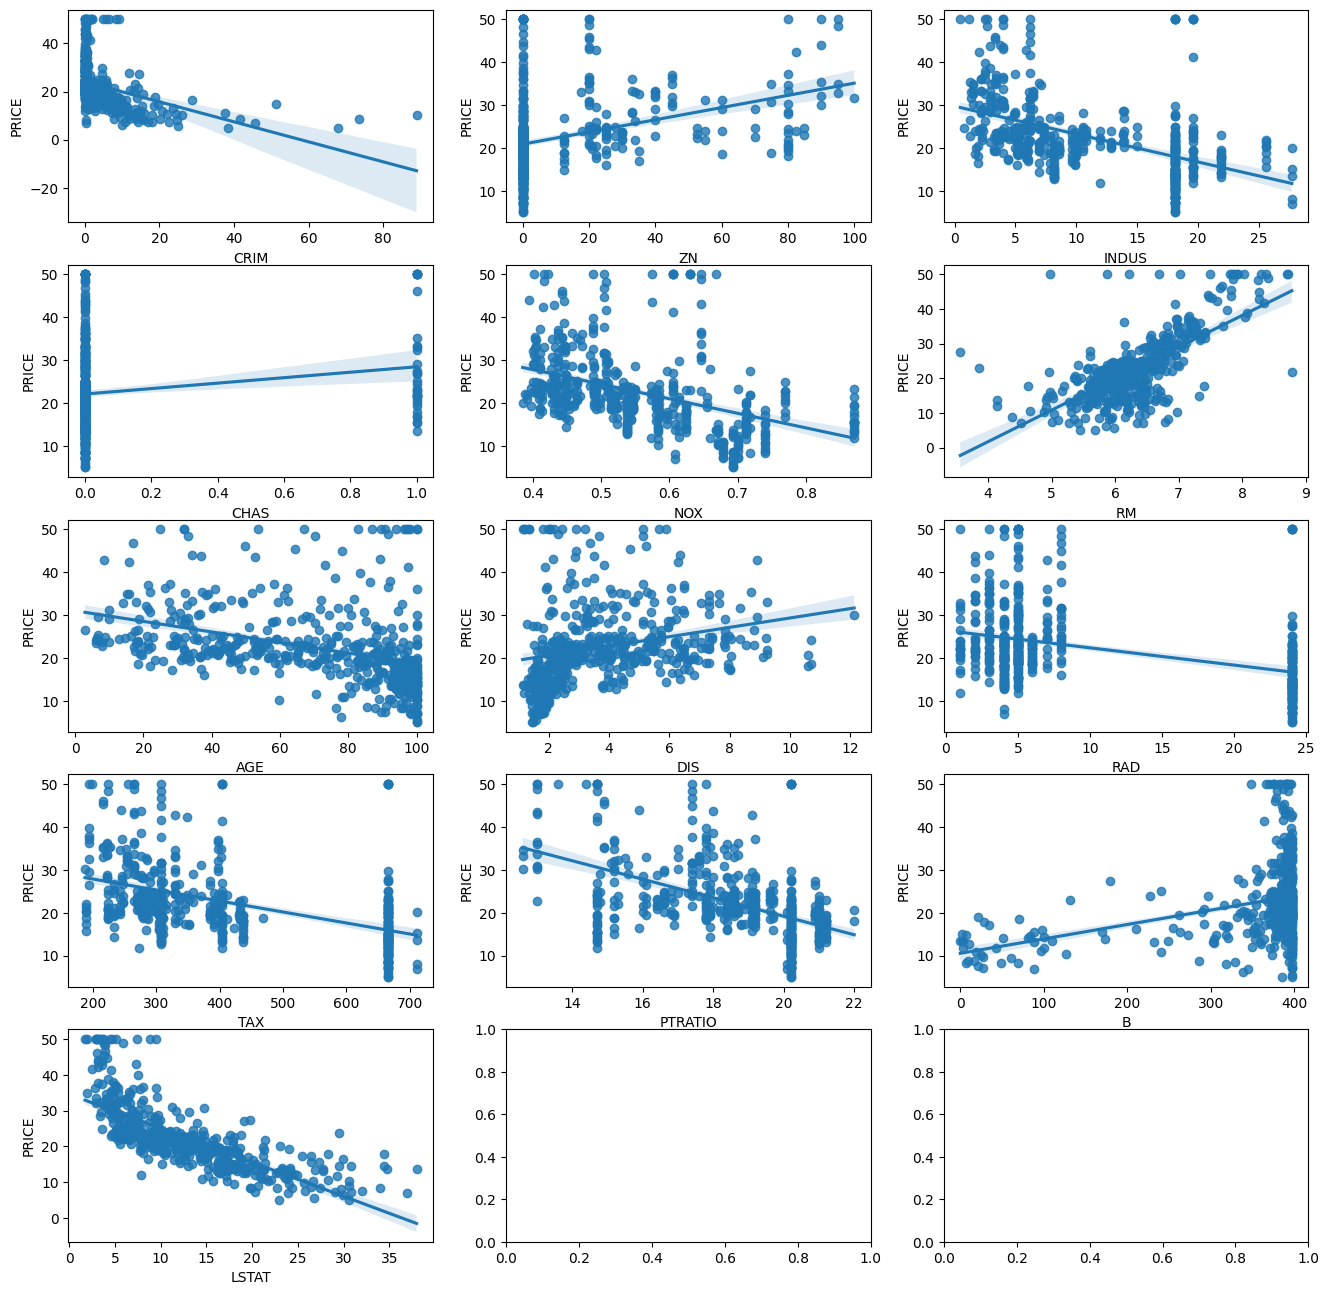

In [51]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])